# Magnetic Fields

We have seen linear and diffuse motion. We will now analyse where in this range the motion of charged particles in a magnetic field takes place, depending on the strength of the field.

CRPropa offers the PropagationCK module for this, but we need to apply the magnetic field to a vector grid first.

In [1]:
from crpropa import *

randomSeed = 42
vgrid = VectorGrid(Vector3d(0), 256, 30*kpc)
initTurbulence(vgrid, 10*nG, 100*kpc, 1000*kpc, -11./3., randomSeed)
Bfield = MagneticFieldGrid(vgrid)

sim = ModuleList()
sim.add(PropagationCK(Bfield))
sim.add(MaximumTrajectoryLength(100*Mpc))

The trajectory will be stored in memory and a source is generating protons. We now need to specify the energy of the particles.

In [2]:
output = ParticleCollector(10000, True) 
sim.add(output)

source = Source()
source.add(SourceParticleType(nucleusId(1, 1)))
source.add(SourcePowerLawSpectrum(1*EeV, 1*EeV, -1))
source.add(SourceIsotropicEmission())
source.add(SourcePosition(Vector3d(0, 0, 0)*Mpc))

The simulation starts with source generating 30 particles.

In [3]:
sim.run(source, 2, False)

To plot the trajectories we use matplotlib.

<IPython.core.display.Javascript object>


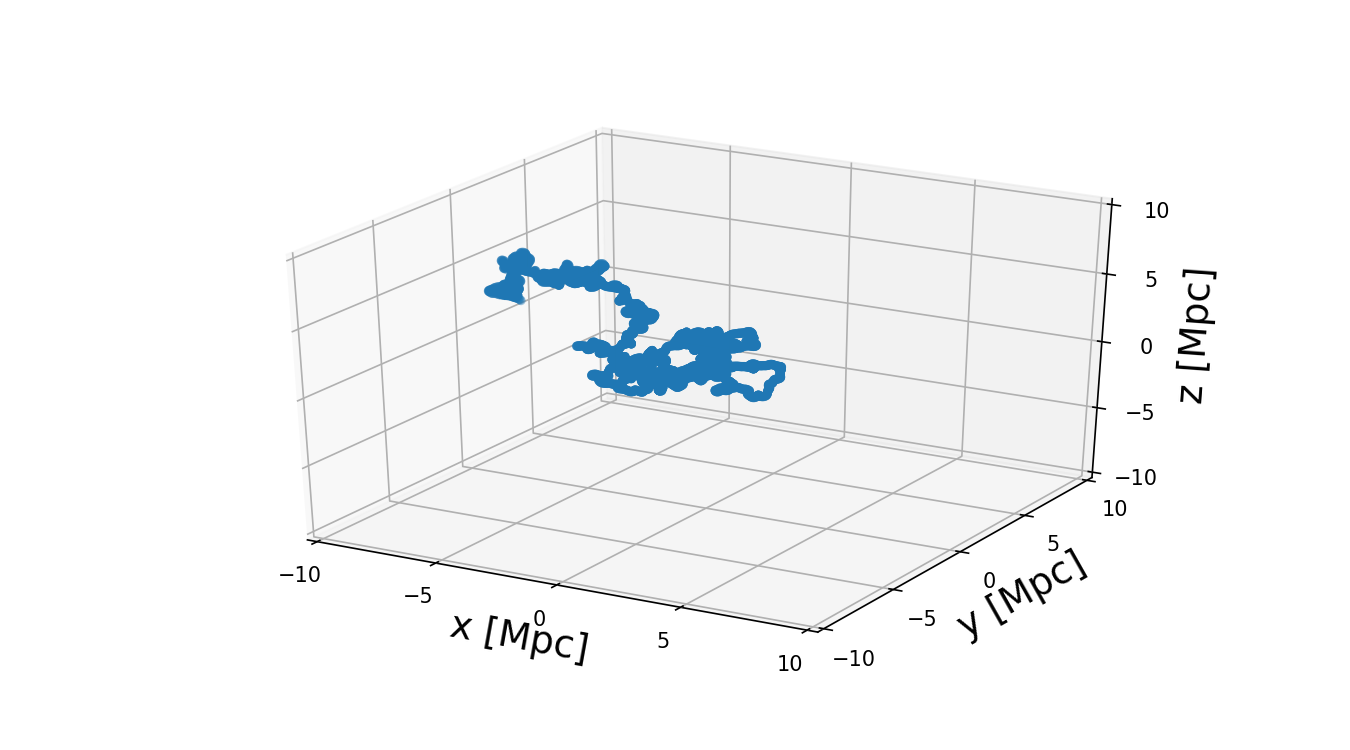

In [4]:
%matplotlib notebook
from pylab import *
from mpl_toolkits.mplot3d import axes3d

data = []
for c in output:
    pos = c.current.getPosition()
    data.append([c.getTrajectoryLength(), pos.getX(), pos.getY(), pos.getZ()])
data = np.array(data) / Mpc

# trajectory points
x, y, z = data[:,1], data[:,2], data[:,3]

fig = plt.figure(figsize=(9, 5))#plt.figaspect(0.5))
ax = fig.gca(projection='3d')# , aspect='equal'

ax.scatter(x,y,z, 'o', lw=0)

ax.set_xlabel('x [Mpc]', fontsize=18)
ax.set_ylabel('y [Mpc]', fontsize=18)
ax.set_zlabel('z [Mpc]', fontsize=18)
ax.set_xlim((-10, 10))
ax.set_ylim((-10, 10))
ax.set_zlim((-10, 10))
ax.xaxis.set_ticks((-10, -5, 0, 5, 10))
ax.yaxis.set_ticks((-10, -5, 0, 5, 10))
ax.zaxis.set_ticks((-10, -5, 0, 5, 10))

show()

Instead of this bunch of points we want to plot an overview how far away from the origin the particles have travelled. We call that the radius r. The overall distance travelled back and forth again is called d from CPPropa. To get the relation to diffusion constant D we plot the average of the squared radii < r² >.

But first we do some conversion on our data to get the info we need.

In [5]:
from collections import defaultdict
import numpy as np
grouped = defaultdict(list)
d = []
r_sq = []
d_end = 0
#print(data.dtype.names)
for di, X, Y, Z in data:
    grouped[di].append(X**2 + Y**2 + Z**2)
for di in grouped: 
    d.append(di)
    r_sq.append(np.mean(grouped[di]))
    d_end = max(d_end, di)
print('After last step:')
print('r_min   = ' + str(sqrt(np.min(grouped[d_end]))))
print('r_max   = ' + str(sqrt(np.max(grouped[d_end]))))
r_avg = np.mean(sqrt(grouped[d_end]))
print('< r >   = ' + str(r_avg))
print('< r >²  = ' + str(r_avg**2))
r_sq_avg = np.mean(grouped[d_end])
print('< r² >  = ' + str(r_sq_avg))
print('sigma_r = ' + str(sqrt(r_sq_avg - r_avg**2)))


After last step:
r_min   = 4.93139460582
r_max   = 11.079910726
< r >   = 8.00565266589
< r >²  = 64.0904746068
< r² >  = 73.5415372267
sigma_r = 3.07425806007


<IPython.core.display.Javascript object>


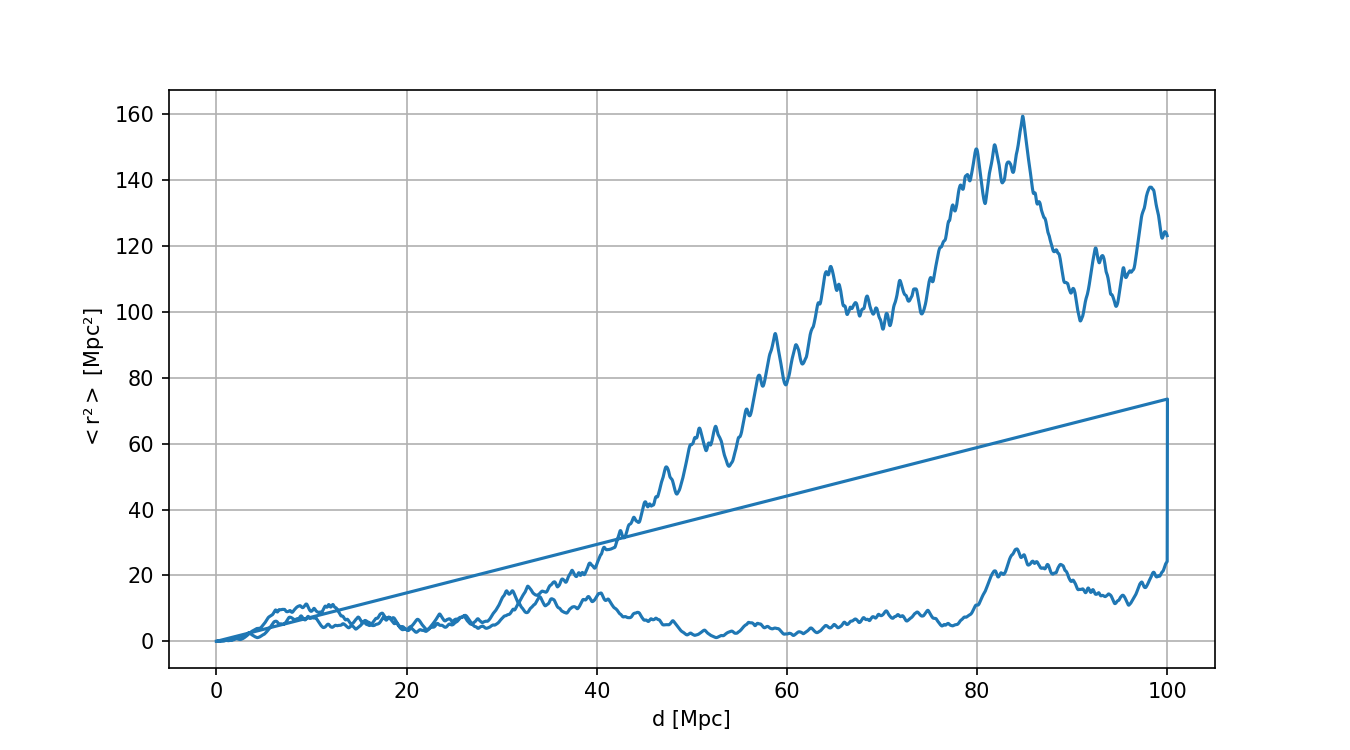

In [6]:
figure(figsize=(9, 5))
plot(d, r_sq)
grid()
ylabel('$<$r²$>$ [Mpc²]')
xlabel('d [Mpc]')
show()

Then the diffusion constant D is the slope of the line approaching this curve.

In [7]:
#TODO This is from last point only, rather use linear regression
D = np.max(r_sq) / np.max(d)
print('D = ' + str(D))

D = 1.59413299215
